In [2]:
#LIBRERÍAS NECESARIAS
library("FNN")
library("MASS")
library("stats")
library("readr")
library("caret")
library("e1071")
library("mclust")
library("sparcl")
library("kohonen")
library("cluster")
library("fields")
library(tree)
library(class)
library(randomForest)
library(tsne)
library(Rtsne)

Warning message:
"package 'FNN' was built under R version 3.5.3"Loading required package: lattice
Loading required package: ggplot2
Package 'mclust' version 5.4.2
Type 'citation("mclust")' for citing this R package in publications.
Warning message:
"package 'kohonen' was built under R version 3.5.3"
Attaching package: 'kohonen'

The following object is masked from 'package:mclust':

    map

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.2-1 (2018-12-20) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps

Attaching package: 'maps'

The following object is masked from 'package:cluster':

    votes.repub

The f

# · Creación del dataset

In [3]:
corazon=read.csv('corazon_g.csv', header = TRUE, sep = ',')
corazon=corazon[,-1]
bazo=read.csv('bazo_g.csv',header=TRUE)
bazo=bazo[,-1]
glandula=read.csv('glandula_g.csv',header=TRUE)
glandula=glandula[,-1]
timo=read.csv('timo_g.csv', header = TRUE, sep = ',')
timo=timo[,-1]
pulmon=read.csv('pulmon_g.csv',header=TRUE)
pulmon=pulmon[,-1]
rinon=read.csv('riñon_g.csv',header=TRUE)
rinon=rinon[,-1]
rinon['etiqueta']='rinon'
medula=read.csv('medula_g.csv', header = TRUE, sep = ',')
medula=medula[,-1]
vejiga=read.csv('vejiga_g.csv',header=TRUE)
vejiga=vejiga[,-1]
higado=read.csv('higado_g.csv',header=TRUE)
higado=higado[,-1]

df=rbind(corazon,bazo,glandula,timo,pulmon,rinon,medula,vejiga,higado)
dim(df)

[1]  3600 23434

### Separamos en train y test

In [4]:
y=df$etiqueta
x=df[,-ncol(df)]
y=as.character(y)
y[which(y=='corazon')]<-2
y[which(y=='bazo')]<-1
y[which(y=='glandula')]<-3
y[which(y=='timo')]<-8
y[which(y=='pulmon')]<-6
y[which(y=='rinon')]<-7
y[which(y=='vejiga')]<-9
y[which(y=='higado')]<-4
y[which(y=='medula')]<-5

In [5]:
set.seed(2)
indtrain = sample(1:3600, round(0.75*3600))  
indtest = setdiff(1:3600, indtrain)
df.occ=data.frame(y=y, predictors=x)
df.train=df.occ[indtrain,]
df.test=df.occ[indtest,]

# · Clasificación con todos los datos

### KNN (dura mucho tiempo)

In [5]:
df.train['y']=as.numeric(y[indtrain])
df.test['y']=as.numeric(y[indtest])

In [6]:
## predicción sobre test con k=1
predd=knn(df.train[,-1],df.test[,-1],df.train$y,k=1)
confusionMatrix(as.factor(predd), as.factor(df.test$y))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  85   2   7   0   2  11   1   4   0
         2   1  97   3   0   1   2   1   0   2
         3   1   1  73   0   1   6   0   2   0
         4   0   0   0 102   0   0   0   0   0
         5   3   0   3   0  79   5   1   0   0
         6   1   3   5   1   6  77   2   1   0
         7   0   1   1   0   0   3  99   0   0
         8   0   0   1   0   3   2   0  99   0
         9   0   0   1   0   0   0   0   0  98

Overall Statistics
                                          
               Accuracy : 0.8989          
                 95% CI : (0.8773, 0.9178)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8862          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

# · Segmentación con todos los datos

### K-means

In [5]:
kmModel<-kmeans(df[,-ncol(df)],9,nstart=1)
summary(kmModel)
confusionMatrix(as.factor(as.numeric(df[,ncol(df)])),as.factor(kmModel$cluster))

             Length Class  Mode   
cluster        3600 -none- numeric
centers      210897 -none- numeric
totss             1 -none- numeric
withinss          9 -none- numeric
tot.withinss      1 -none- numeric
betweenss         1 -none- numeric
size              9 -none- numeric
iter              1 -none- numeric
ifault            1 -none- numeric

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   0  15   0   3   0 164 210   0   8
         2   0 131   0   0   0 267   2   0   0
         3   5 245   6   0   0  92  46   0   6
         4   0 116   0   0   0 279   5   0   0
         5   1 126   0   0   0 236  29   0   8
         6   0  17   0  84   0 233  34   0  32
         7   0 184   0   0   0 106   2 108   0
         8 143  27 162   1   0   8  56   0   3
         9   0   0   0   0 374  23   2   0   1

Overall Statistics
                                         
               Accuracy : 0.1036         
                 95% CI : (0.0938, 0.114)
    No Information Rate : 0.3911         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : -0.0084        
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0

### t-sne y Rt-sne

sigma summary: Min. : 0.268389233283878 |1st Qu. : 0.390718833176029 |Median : 0.465888679050756 |Mean : 0.510170794535806 |3rd Qu. : 0.592205027066091 |Max. : 1.53096090624533 |
Epoch: Iteration #100 error is: 18.2892316996218
Epoch: Iteration #200 error is: 1.55672443582085
Epoch: Iteration #300 error is: 1.35339461724919
Epoch: Iteration #400 error is: 1.26679513978343
Epoch: Iteration #500 error is: 1.23242293500382
Epoch: Iteration #600 error is: 1.21407474302056
Epoch: Iteration #700 error is: 1.20293666412312
Epoch: Iteration #800 error is: 1.19563524128298
Epoch: Iteration #900 error is: 1.19052794033762
Epoch: Iteration #1000 error is: 1.18677379741004


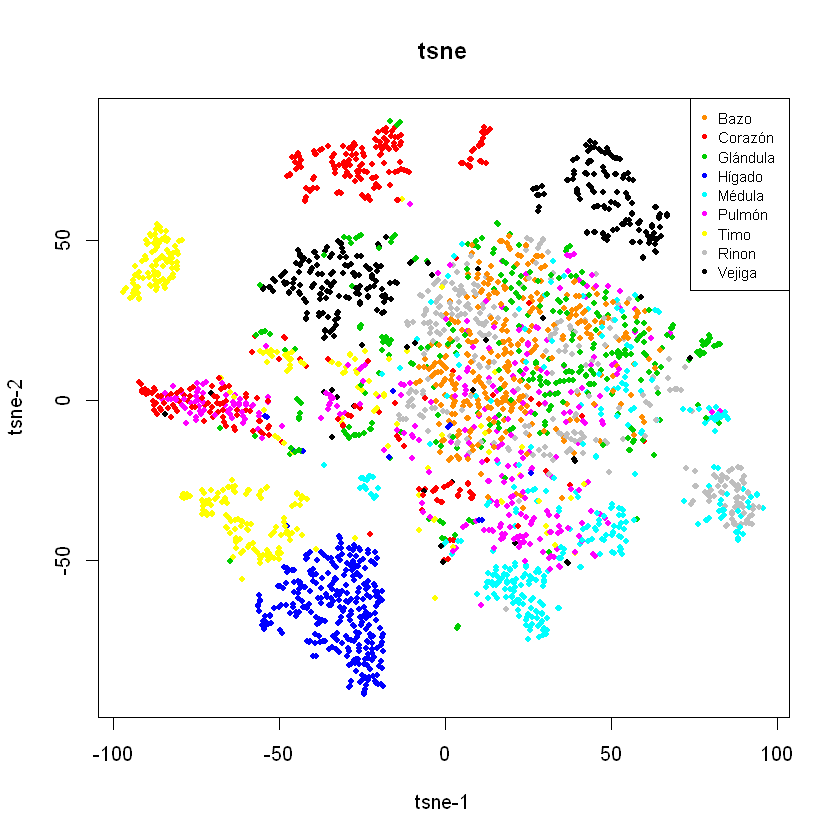

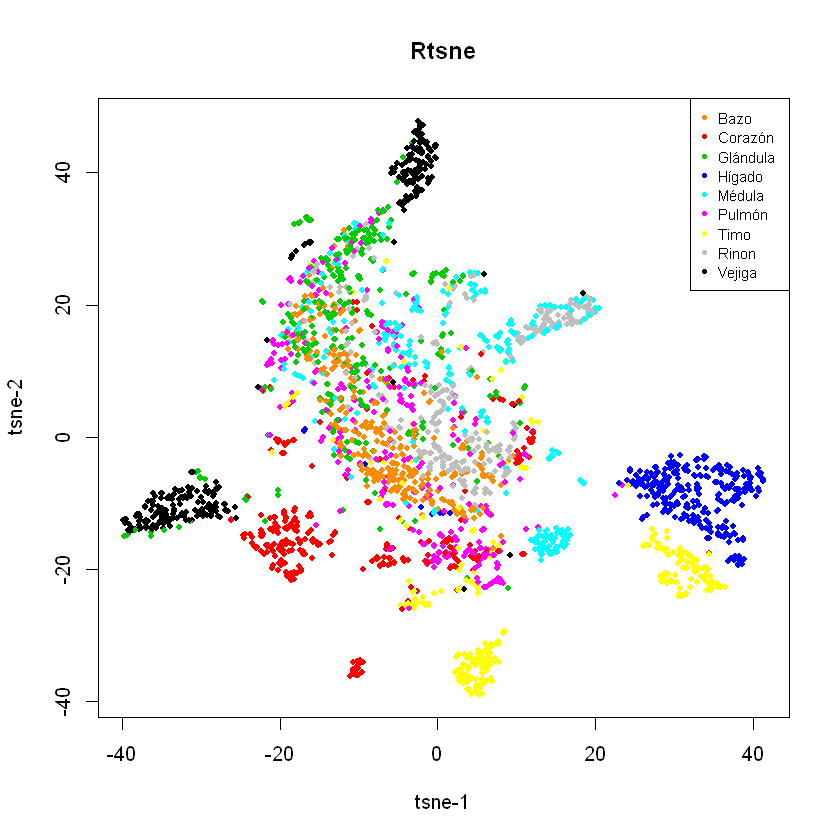

In [16]:
rtsne <- Rtsne(df.train[,2:1000],check_duplicates = FALSE)
tsne <- tsne(df.train[,2:1000])
colors=as.numeric(df.train$y)
colors[which(colors==1)]<-"darkorange"
plot(tsne,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="tsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")
plot(rtsne$Y,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="Rtsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")

In [8]:
#tsne +kmeans
d_tsne = as.data.frame(tsne)
fit_cluster_kmeans=kmeans(scale(d_tsne), 9)  
d_tsne$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train$y))
d_tsne$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1 131   1   0  18   0   0 156   0   3
         2   1  28  13   4   2  25  11 129  83
         3 118  12   0  29   1  11  66  49  20
         4   0   0   0   3 286   0   3   0   5
         5  43  26   0 175   0  29  14   0  21
         6  42  10   0 101   0   0  60  19  62
         7   1   6  98  13  45   0  24  31  78
         8  76   5   0   8   0  70 135   0   0
         9   1 135   0   3   0  54  14  91   2

Overall Statistics
                                          
               Accuracy : 0.0696          
                 95% CI : (0.0603, 0.0799)
    No Information Rate : 0.1789          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0467         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

In [10]:
#rtsne+kmeans
d_tsne_1 = as.data.frame(rtsne$Y)
fit_cluster_kmeans=kmeans(scale(d_tsne_1), 9,nstart = 100)  
d_tsne_1$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train$y))
d_tsne_1$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1   6   0   0 118   1   0   7 177   0
         2   0   1  16  23  73 162  10  10   1
         3  96  19   5 102   3   7  48  26   0
         4   0   0   0   3   1   0   0   6 287
         5  17   0 138  37   8   0  89  19   0
         6  22   1   8  73  73   3  35  77   2
         7   1   0   7   8 139   2   7  16 116
         8  12   0  86  24   0   0  38 134   0
         9 134 157   1   2   3   0   3   0   0

Overall Statistics
                                          
               Accuracy : 0.0619          
                 95% CI : (0.0531, 0.0716)
    No Information Rate : 0.1722          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0554         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1  Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity   

# · Correlación para quedarnos con las columnas (genes) importantes

Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), m

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeric(y), as.integer((x[, ivar])), method = "spearman"):
"the standard deviation is zero"Warning message in cor(as.numeri

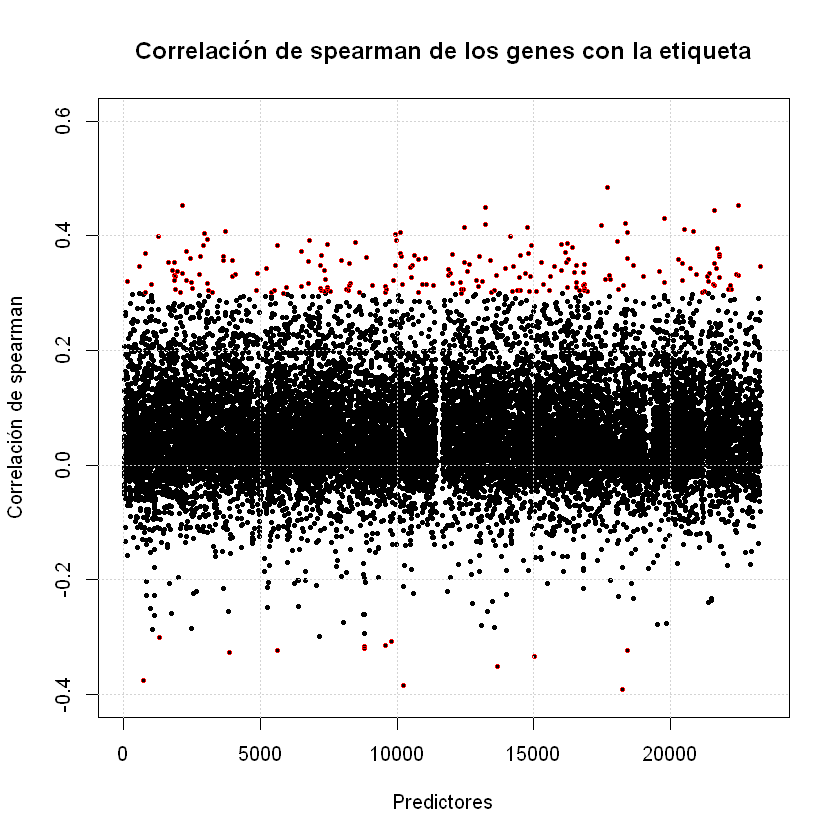

In [6]:
## correlación de spearman de cada gen con la etiqueta
r.xy = c()
for (ivar in 1:ncol(x)) {
  r.xy[ivar] = cor(as.numeric(y), as.integer((x[,ivar])), method = "spearman")
}
plot(r.xy, ylim = c(-0.4, 0.6), pch = 19, cex = 0.5, main="Correlación de spearman de los genes con la etiqueta", xlab = "Predictores", ylab = "Correlación de spearman")
grid()

ind.sele = which(abs(r.xy) > 0.3)
points(ind.sele, r.xy[ind.sele], col = "red", cex = 0.5)
#para eliminar predictores que no aportan ninguna informacion a nuestro problema (reducimos predictores)

In [17]:
length(ind.sele)

[1] 211

In [8]:
# datasets con las columnas seleccionadas
df.train2=df.train[,ind.sele]
df.test2=df.test[,ind.sele]
df.train2['y']=as.numeric(y[indtrain])
df.test2['y']=as.numeric(y[indtest])

# ·Segmentación con índices seleccionados

### t-sne y Rt-sne

sigma summary: Min. : 0.19202429260962 |1st Qu. : 0.416276397277679 |Median : 0.474041968414019 |Mean : 0.511461416321343 |3rd Qu. : 0.567145040087859 |Max. : 1.50866226870457 |
Epoch: Iteration #100 error is: 19.482945708154
Epoch: Iteration #200 error is: 1.72508791640499
Epoch: Iteration #300 error is: 1.52867820397964
Epoch: Iteration #400 error is: 1.44357804369827
Epoch: Iteration #500 error is: 1.40995590192197
Epoch: Iteration #600 error is: 1.39241283247046
Epoch: Iteration #700 error is: 1.38201193770285
Epoch: Iteration #800 error is: 1.37529177707843
Epoch: Iteration #900 error is: 1.3706922318052
Epoch: Iteration #1000 error is: 1.36738841450364


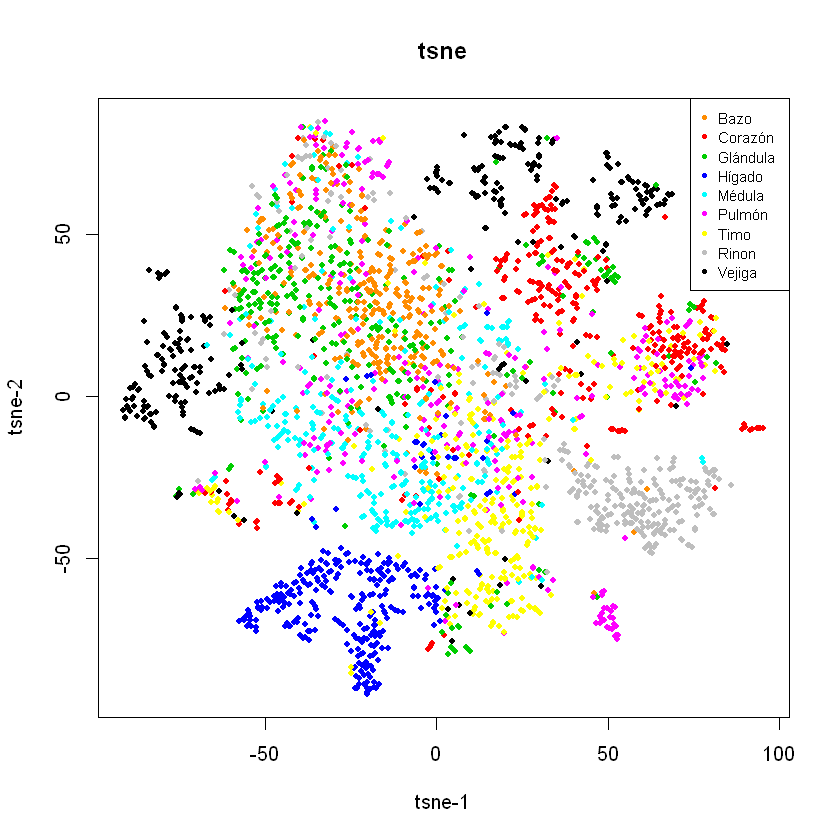

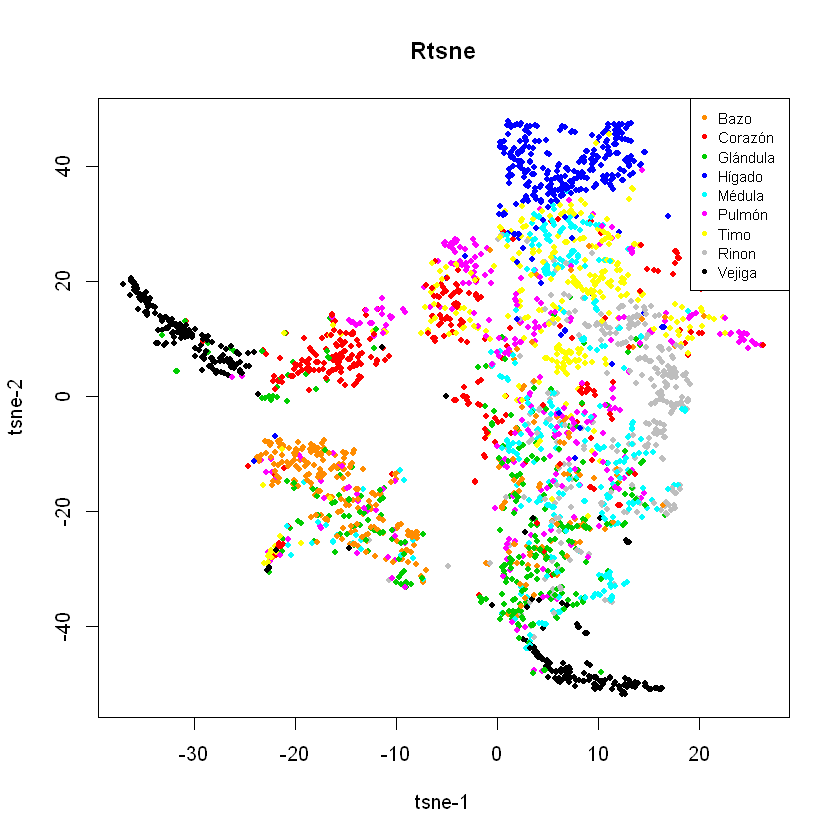

In [19]:
rtsne <- Rtsne(df.train2[,-ncol(df.train2)],check_duplicates = FALSE)
tsne <- tsne(df.train2[,-ncol(df.train2)])
colors=df.train2$y
colors[which(colors==1)]<-"darkorange"
plot(tsne,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="tsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")
plot(rtsne$Y,col=colors,  pch=20, xlab="tsne-1", ylab="tsne-2", main="Rtsne")
legend(x = "topright", legend = c("Bazo", "Corazón","Glándula","Hígado","Médula","Pulmón","Timo","Rinon","Vejiga"), col=c("darkorange",2,3,4,5,6,7,8,9),pch = 20,cex = 0.75, bty = "c")

In [20]:
#tsne +kmeans
d_tsne = as.data.frame(tsne)
fit_cluster_kmeans=kmeans(scale(d_tsne), 9)  
d_tsne$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train2$y))
d_tsne$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1 161   4   0  14   9   0  11   0 110
         2  14   2 106   1  14 117  29   5   8
         3  73   1  30  55  11  12  16  14  94
         4   6   0   0   0  22   1   4 264   0
         5  50   3   0  13  97   2 112   8  23
         6  43  29   7   6  43  58  39   3  66
         7  20   1   4   0 185  51  21  11   3
         8  29 192   0  10  13   6   9   0  35
         9   6   0 136 124   6   4   8   3  13

Overall Statistics
                                          
               Accuracy : 0.1415          
                 95% CI : (0.1285, 0.1552)
    No Information Rate : 0.1489          
    P-Value [Acc > NIR] : 0.8665          
                                          
                  Kappa : 0.0338          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 1  Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity   

In [21]:
#-rtsne+kmeans
d_tsne_1 = as.data.frame(rtsne$Y)
fit_cluster_kmeans=kmeans(scale(d_tsne_1), 9)  
d_tsne_1$cl_kmeans = factor(fit_cluster_kmeans$cluster)
levels=as.numeric(as.character(df.train2$y))
d_tsne_1$realidad=factor(levels)
confusionMatrix(as.factor(levels),as.factor(fit_cluster_kmeans$cluster))

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  11   0  48  56 182   6   0   6   0
         2  75   4  44   3  22   9 115  22   2
         3   5   0  83 125  74   3  13   3   0
         4   4 153   3   0   2   5   0   4 126
         5  11  37 118  59  18  49   0   7   9
         6  71   2  71  28  32  26  20  39   5
         7  53  33  14   0  18 129   7  25  17
         8   4   3  94  27   2  46   0 118   0
         9   1   0   6 130 160   0   3   0   0

Overall Statistics
                                          
               Accuracy : 0.0989          
                 95% CI : (0.0879, 0.1108)
    No Information Rate : 0.1889          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0143         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

### k-means

In [25]:
kmModel<-kmeans(df[,ind.sele],9,nstart=1)
summary(kmModel)
confusionMatrix(as.factor(as.numeric(df[,ncol(df)])),as.factor(kmModel$cluster))

             Length Class  Mode   
cluster      3600   -none- numeric
centers      1899   -none- numeric
totss           1   -none- numeric
withinss        9   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            9   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  31   6   5   9   6 317   0   0  26
         2   0   0   0   1 256 143   0   0   0
         3  25   1   1   6  79 275  12   1   0
         4   0   0   0   1   5 294   0 100   0
         5  66   0   0   7  43 284   0   0   0
         6  13   0 189  18   8 171   1   0   0
         7  66   0   1   1  31 236   0  65   0
         8  92 143   0   5   0  23 137   0   0
         9  23   0   0   0   0 377   0   0   0

Overall Statistics
                                          
               Accuracy : 0.0686          
                 95% CI : (0.0606, 0.0774)
    No Information Rate : 0.5889          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : -0.0478         
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2  Class: 3  Class: 4 Class: 5 Class: 6
Sensitivity  

# ·Clasificación con índices seleccionados

### GLMs

In [9]:
# #GLM
# df.train$y=as.numeric(as.character(df.train$y))
# df.test$y=as.numeric(as.character(df.test$y))

numeros2<-function(n){
    df.train2$y[which(df.train2$y != n)] <- 0 ; df.train2$y[which(df.train2$y == n)] <- 1
    df.test$y[which(df.test2$y != n)] <- 0 ; df.test$y[which(df.test2$y == n)] <- 1
    DatT <- df.train2;
    Datt<- df.test2;
    M <- glm(y~., data = DatT[,], family = binomial(link = "logit"))
    Out <- M$fitted.values
    Outbin <- as.double(Out > 0.5)
    Acct<-100*sum(diag(table(DatT[,1], Outbin))) / length(Outbin)
    Out2<- predict(object=M, newdata = Datt[,]);
    Outbin2 <- as.double(Out2 > 0.5)
    AccT<-100*sum(diag(table(Datt[,1], Outbin2))) / length(Outbin2)
    
    return(AccT) 
}
A<-c()
for (i in 1:9){ 
    A<-c(A, numeros2(i))}

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"predi

In [10]:
A
print(mean(A))

[1] 80.00000 88.88889 91.22222 85.11111 94.33333 93.44444 87.44444 87.44444
[9] 88.44444

[1] 88.48148


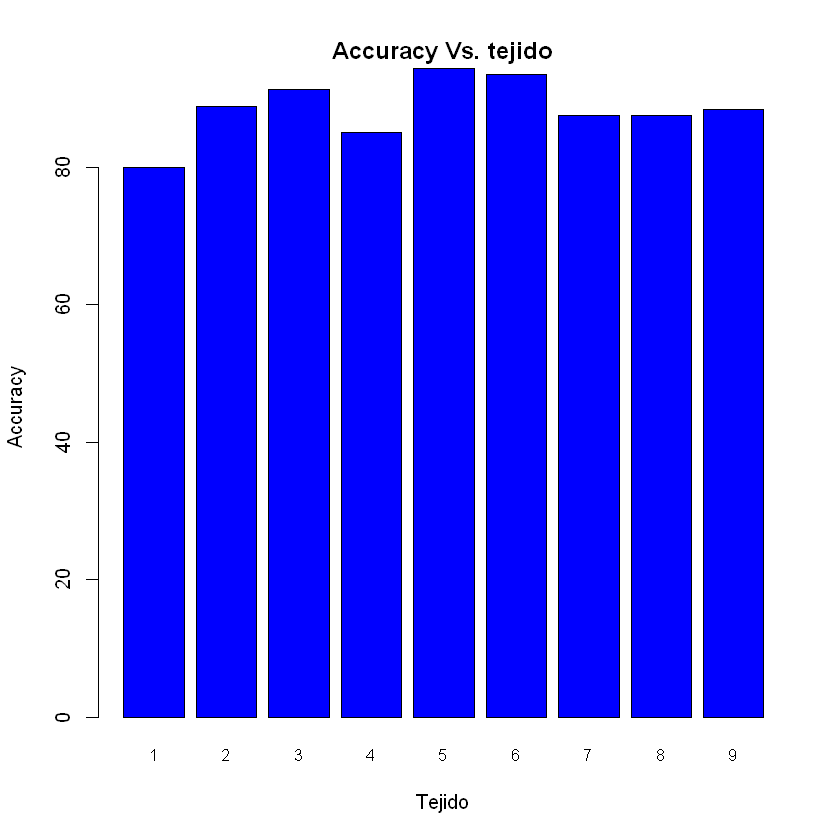

In [11]:
barplot(A,names.arg = 1:9,cex.names=0.8, ylab = "Accuracy", xlab="Tejido",col='blue',ylim=c(0,90),main="Accuracy Vs. tejido")

### KNN

In [26]:
## predicción sobre test con k=1
predd=knn((df.train2[,-ncol(df.train2)]),(df.test2[,-ncol(df.test2)]),df.train2$y,k=1)
confusionMatrix(as.factor(predd), as.factor(df.test2$y))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 60  3 21  1  5 13  2 12  0
         2  0 74  6  0  0  3  8  1  4
         3 21  3 43  0  6 10  1  9  1
         4  1  0  0 99  3  0  7  0  0
         5  4  6  7  1 58 23 18  8  1
         6  4  6  9  0  4 43 10  4  0
         7  0 10  0  2  0  7 54  1  0
         8  1  1  5  0 15  6  4 71  0
         9  0  1  3  0  1  1  0  0 94

Overall Statistics
                                          
               Accuracy : 0.6622          
                 95% CI : (0.6303, 0.6931)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6203          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.65934  0.71154  0.45745   0.9612  0.63043  0.40566
Specificity           0.92954 

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: predictors.Olfr12, predictors.Bc1, predictors.A930009A15Rik, predictors.X4930401O12Rik, predictors.Neurog1, predictors.X2410141K09Rik, predictors.Htr2a, predictors.X4930430F21Rik, predictors.Mir875, predictors.Mir1249, predictors.Mir1941, predictors.Sept12, predictors.Fam69c, predictors.X4930526L06Rik, predictors.X1700061F12Rik, predictors.X4930412B13Rik, predictors.Wfdc15a, predictors.Tubb1, predictors.Birc7, predictors.Mir1905, predictors.Sprr3, predictors.Sprr4, predictors.X4933401H06Rik, predictors.X1700021N21Rik, predictors.Gm13003, predictors.Mir3471.1, predictors.AA545190, predictors.Gm6644, predictors.Svs1, predictors.Mir196b, predictors.Oscar, predictors.Ffar1, predictors.Gm7616, predictors.Gm10635"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: predictors.Olfr12, pred

"These variables have zero variances: predictors.Olfr12, predictors.Bc1, predictors.A930009A15Rik, predictors.X4930401O12Rik, predictors.Neurog1, predictors.X2410141K09Rik, predictors.Htr2a, predictors.X4930430F21Rik, predictors.Mir875, predictors.Mir1249, predictors.Mir1941, predictors.Sept12, predictors.Fam69c, predictors.X4930526L06Rik, predictors.X1700061F12Rik, predictors.X4930412B13Rik, predictors.Wfdc15a, predictors.Tubb1, predictors.Birc7, predictors.Mir1905, predictors.Sprr3, predictors.Sprr4, predictors.X4933401H06Rik, predictors.X1700021N21Rik, predictors.Gm13003, predictors.Mir3471.1, predictors.AA545190, predictors.Gm6644, predictors.Svs1, predictors.Mir196b, predictors.Oscar, predictors.Ffar1, predictors.Gm7616, predictors.Gm10635"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: predictors.Olfr12, predictors.Bc1, predictors.A930009A15Rik, predictors.X4930401O12Rik, predictors.Neurog1, predict

"These variables have zero variances: predictors.Olfr12, predictors.Bc1, predictors.Jsrp1, predictors.A930009A15Rik, predictors.Gh, predictors.X4930401O12Rik, predictors.Neurog1, predictors.X4930430F21Rik, predictors.Mir875, predictors.Mir1249, predictors.Mir1941, predictors.Sept12, predictors.X4833427F10Rik, predictors.X4930526L06Rik, predictors.X4930412B13Rik, predictors.Wfdc15a, predictors.Tubb1, predictors.Birc7, predictors.Mir1905, predictors.Sprr3, predictors.Sprr4, predictors.X4933401H06Rik, predictors.X1700021N21Rik, predictors.Gm13003, predictors.Mir3471.1, predictors.AA545190, predictors.Gm6644, predictors.Svs1, predictors.Mir196b, predictors.Ffar1, predictors.Gm7616, predictors.Gm10635, predictors.Akap14"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: predictors.Olfr12, predictors.Bc1, predictors.Jsrp1, predictors.A930009A15Rik, predictors.Gh, predictors.X4930401O12Rik, predictors.Neurog1, pred

,k
4,7


ERROR: Error in confusionMatrix.default(as.factor(predd2), as.factor(df.test2$y)): the data cannot have more levels than the reference


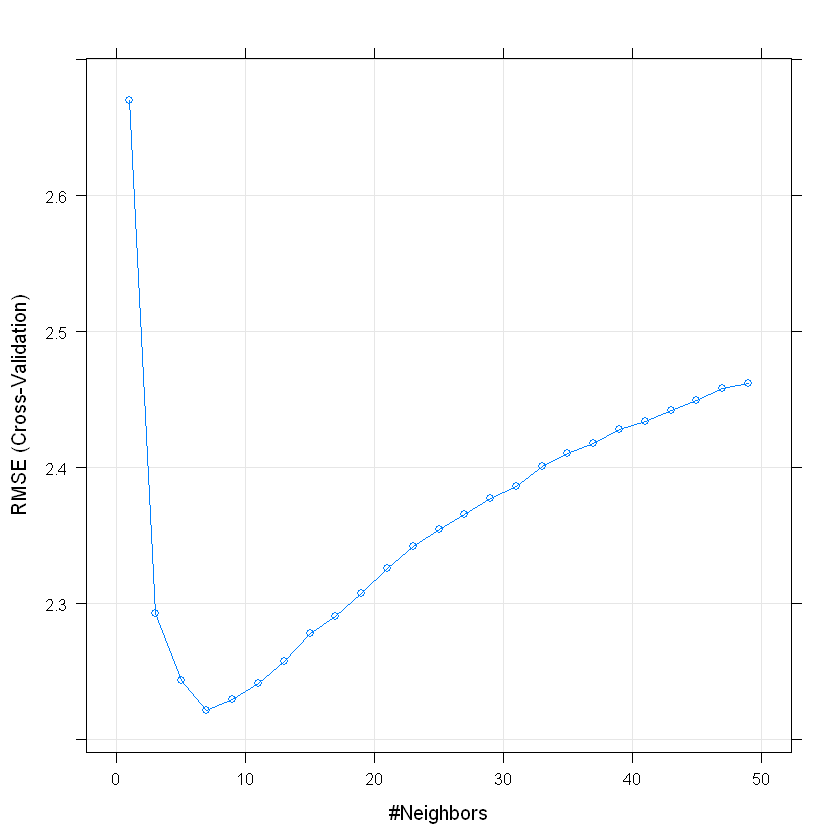

In [119]:
## búsqueda del k óptimo
trctrl=trainControl(method="cv", number=2) #divido mi train en 2, train y validation, de ahi saco mi model cv
knn.fit=train(y~.,df.train2, method="knn",trControl=trctrl, preProcess=c("center", "scale"), tuneGrid=expand.grid(k=seq(from = 1, to=50, by=2)))

plot(knn.fit)
knn.fit$bestTune
predd2 = predict(knn.fit, df.test2[,-ncol(df.test2)])
confusionMatrix(as.factor(predd2), as.factor(df.test2$y))

In [27]:
## predicción sobre test con k óptimo (7)
predd=knn((df.train2[,-ncol(df.train2)]),(df.test2[,-ncol(df.test2)]),df.train2$y,k=7)
confusionMatrix(as.factor(predd), as.factor(df.test2$y))

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 60  2 12  1  7 13  2  7  0
         2  1 76  5  0  0  6  4  1  4
         3 23  2 57  0  8 15  0  9  1
         4  0  1  0 97  4  1 10  0  0
         5  2  9  6  1 46 14 20 11  1
         6  2  8  5  0  6 49  6  3  0
         7  0  3  0  4  1  2 56  0  0
         8  3  2  6  0 20  5  6 75  0
         9  0  1  3  0  0  1  0  0 94

Overall Statistics
                                          
               Accuracy : 0.6778          
                 95% CI : (0.6461, 0.7082)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6377          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.65934  0.73077  0.60638   0.9417  0.50000  0.46226
Specificity           0.94561 

### Árboles de clasifición

In [12]:
df.train3=df.train2*1
df.test3=df.test2*1
df.train3$y=as.factor(df.train3$y)
df.test3$y=as.factor(df.test3$y)

In [13]:
## árbol completo
t = tree(formula = y ~ ., data = df.train3, control=tree.control(nrow(df.train3),mincut=1,minsize=2,mindev=0) )

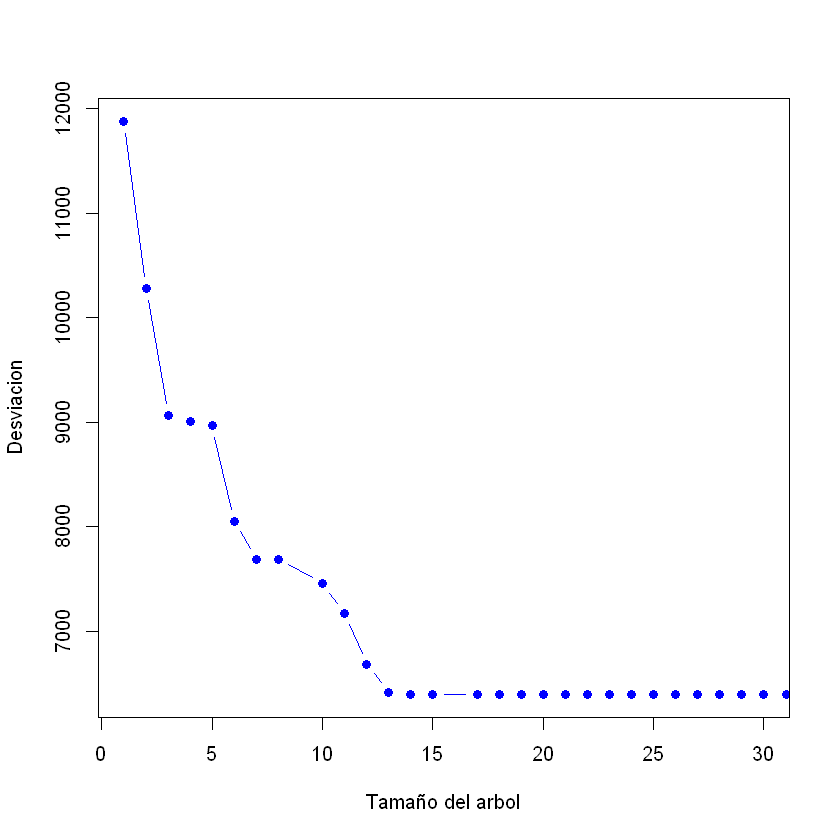

In [14]:
## búsqueda del tamaño de árbol óptimo
a=cv.tree(t, K = 10) #cross validation
plot(a$size,a$dev, xlab="Tamaño del arbol", ylab="Desviación", col="blue",type="b", pch=19,xlim=c(1,30))

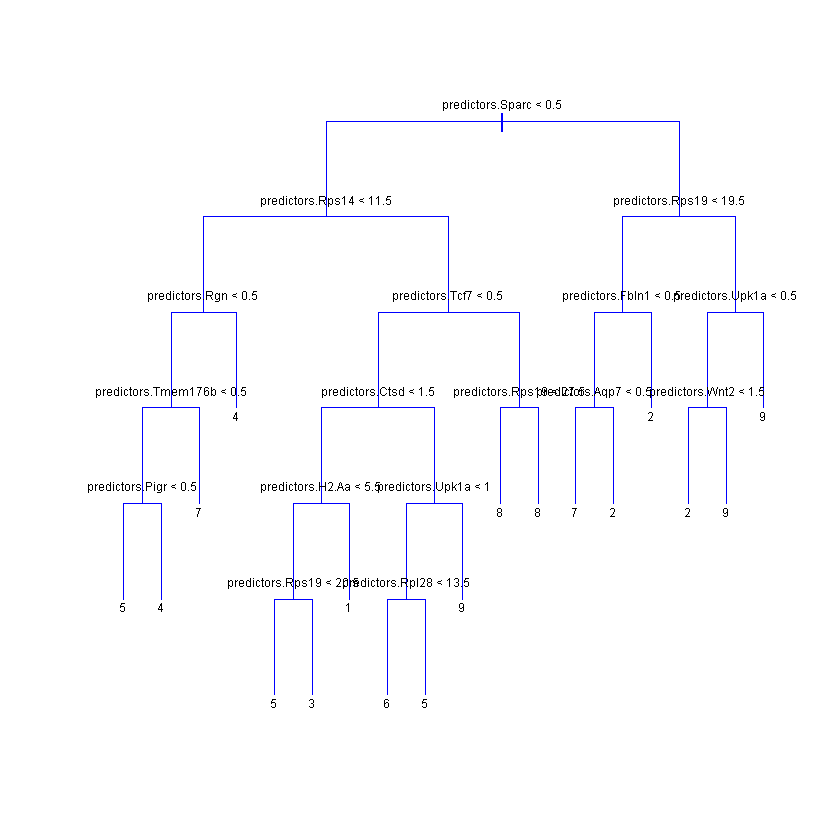

In [15]:
## podamos con tamaño óptimo
t.pruned=prune.tree(t, best = 18) #arbol podado
plot(t.pruned,type = "uniform",col="blue")
text(t.pruned, pretty = T,cex = 0.62,offset = 50,col = 'black',adj=c(0.5,0))

In [32]:
#predicción sobre test
pred.test= predict(t.pruned, df.test3,type="class")
confusionMatrix(pred.test,df.test3$y)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5  6  7  8  9
         1 57  1 15  0 10 10  6  0  0
         2  0 71 28  0  0 11  0  0 14
         3  6  0 27  0 23 11  2  5  0
         4  0  0  0 83  0  1  1  0  0
         5 12  3  7  2 49 14 15 23  0
         6  4  5  0  2  8 22 18  1  0
         7  0 22  3 16  0 32 62  1  0
         8 12  2 11  0  2  5  0 76  0
         9  0  0  3  0  0  0  0  0 86

Overall Statistics
                                          
               Accuracy : 0.5922          
                 95% CI : (0.5593, 0.6245)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5413          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity           0.62637  0.68269  0.28723  0.80583  0.53261  0.20755
Specificity           0.94808 

### Random Forest


Call:
 randomForest(formula = y ~ ., data = df.train3, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 14

        OOB estimate of  error rate: 18.41%
Confusion matrix:
    1   2   3   4   5   6   7   8   9 class.error
1 246   0  37   0   5   7   0  14   0  0.20388350
2   2 264   4   0   6   8   8   3   1  0.10810811
3  50  23 212   0   5   9   4   2   1  0.30718954
4   2   0   0 287   3   2   2   0   1  0.03367003
5  22   0   8   1 252  12   3  10   0  0.18181818
6  28  16  22   0  29 162  21  15   1  0.44897959
7   4  20   2   8  13  15 234   0   0  0.20945946
8   9   0   9   0  17   4   2 253   0  0.13945578
9   0   4   1   0   1   0   1   0 293  0.02333333

[1] 874 875 920 939

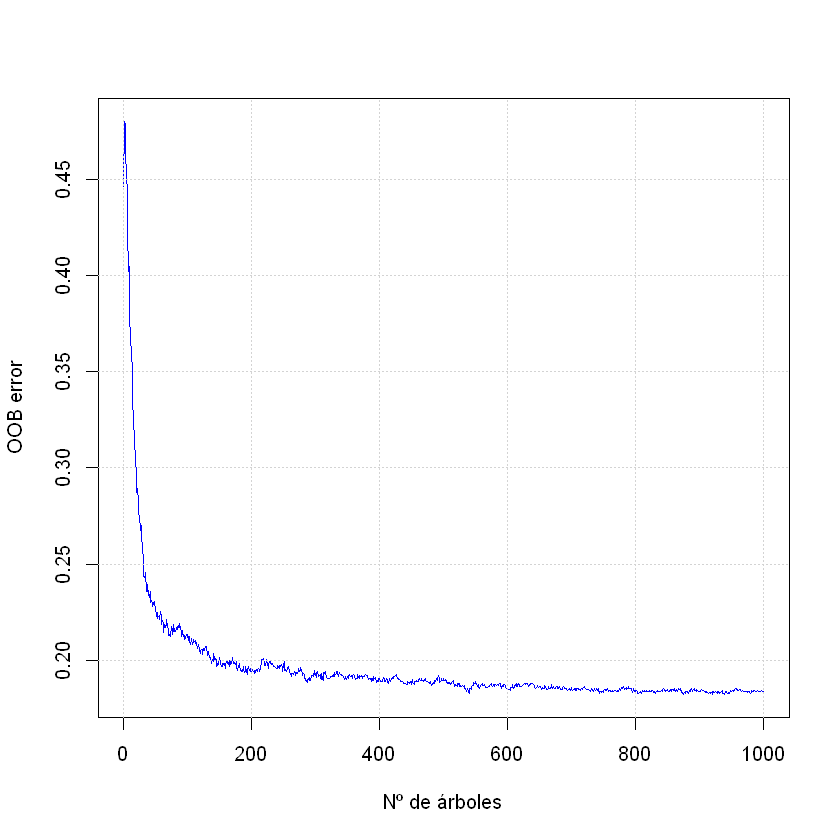

In [16]:
rf = randomForest(y ~., df.train3, ntree=1000)
rf
# OOB error
plot(rf$err.rate[, 1], type = "l", xlab = "Nº de árboles", col="blue",ylab = "OOB error")
grid()
# número óptimo de árboles 
ntree = which(rf$err.rate[,1] == min(rf$err.rate[,1]))
ntree

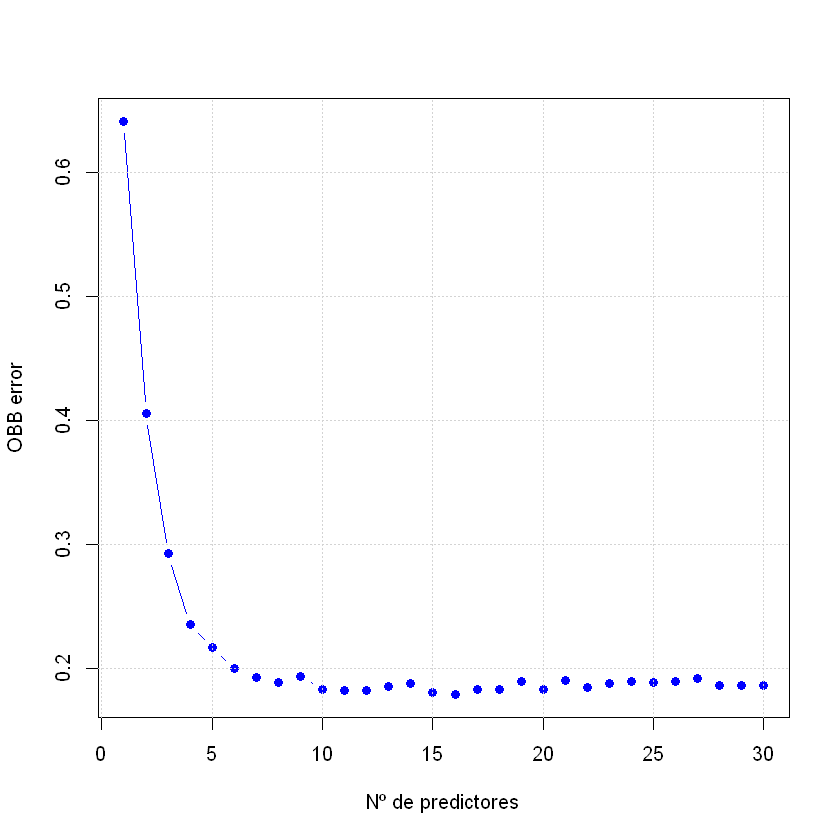

In [17]:
# búsqueda del número óptimo de predictores
err.oob = c()
for (mtry in 1:30) {
rf.mtry = randomForest(y ~., df.train3,ntree = ntree[1], mtry = mtry)
err.oob[mtry] = rf.mtry$err.rate[ntree[1], 1]
}

matplot(1:30 , err.oob, type = "b", pch = 19 ,lty = 1,ylab = "OBB error", col="blue",xlab = "Nº de predictores")
grid()

In [18]:
## modelo con parámetros óptimos
rf.occ = randomForest(y ~., df.train3, ntree = ntree[1], mtry = 14)
rf.occ
## predicción sobre test
pred.r = predict(rf.occ, df.test3)


Call:
 randomForest(formula = y ~ ., data = df.train3, ntree = ntree[1],      mtry = 14) 
               Type of random forest: classification
                     Number of trees: 874
No. of variables tried at each split: 14

        OOB estimate of  error rate: 18.63%
Confusion matrix:
    1   2   3   4   5   6   7   8   9 class.error
1 246   0  39   0   6   6   0  12   0  0.20388350
2   2 263   3   0   5   9  10   3   1  0.11148649
3  52  24 211   0   5   5   5   3   1  0.31045752
4   2   0   0 287   3   1   3   0   1  0.03367003
5  25   0   8   1 253   9   4   8   0  0.17857143
6  32  19  21   0  28 160  19  14   1  0.45578231
7   3  18   3   9  13  18 232   0   0  0.21621622
8   7   1   8   0  20   5   1 252   0  0.14285714
9   0   4   1   0   1   0   1   0 293  0.02333333

In [19]:
confusionMatrix(pred.r,df.test3$y)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1  75   1  10   0   5  10   0   5   0
         2   0  93   9   0   0   8   4   0   2
         3  13   0  69   0   1   5   0   4   0
         4   0   0   0 101   1   0   6   0   0
         5   0   2   1   1  80  14   6   1   0
         6   1   2   1   0   2  55   7   1   0
         7   0   3   1   1   0   6  80   0   0
         8   2   3   2   0   3   7   1  95   0
         9   0   0   1   0   0   1   0   0  98

Overall Statistics
                                          
               Accuracy : 0.8289          
                 95% CI : (0.8027, 0.8529)
    No Information Rate : 0.1178          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8075          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

In [20]:
#Importancia de los genes
importancia=rf.occ$importance
i<-data.frame(importancia)
i2=i[order(i,decreasing = TRUE),]
genes=labels(importancia)[[1]]
genes=genes[order(i,decreasing = TRUE)]
dd=data.frame(i2,genes)
dd[1:20,]

i2,genes
137.05200,predictors.Rps19
132.32936,predictors.Rps14
95.75709,predictors.Rpl28
83.09285,predictors.Sparc
82.08763,predictors.H2.Aa
77.08980,predictors.Tcf7
76.22249,predictors.Rgn
73.36250,predictors.Ctsd
67.29946,predictors.Tmem176b
58.15453,predictors.Pigr


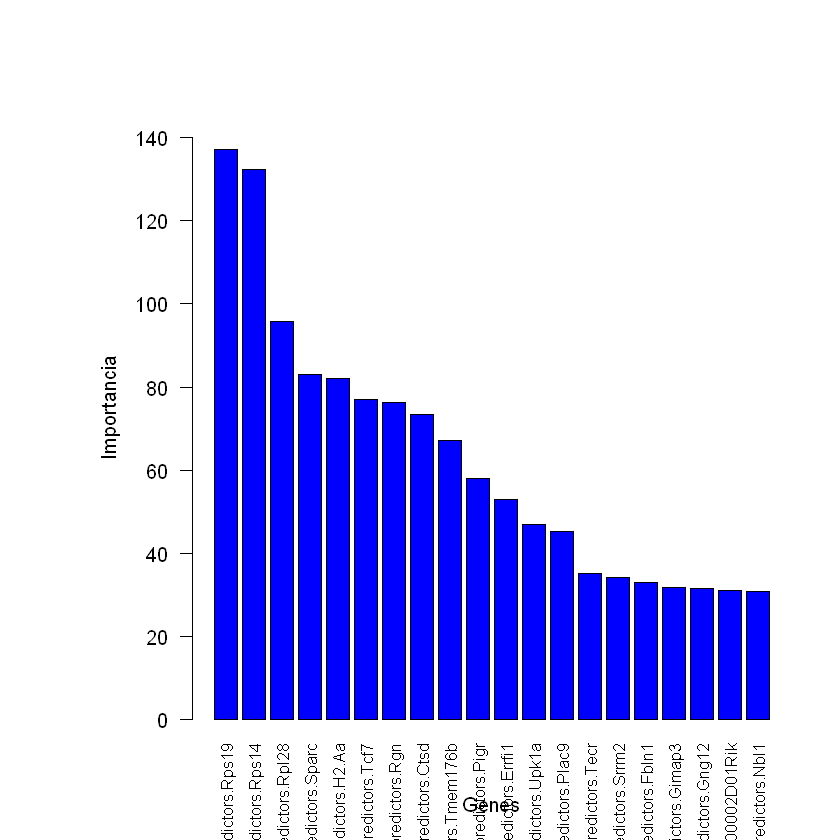

In [22]:
par(las=2) 
par(mar=c(5,8,4,2)) 
barplot(dd[1:20,1],names.arg = dd[1:20,2],cex.names=0.8, ylim=c(0,150),ylab = "Importancia", xlab="Genes",col = 'blue')